Для запуска скачайте модели и распакуйте в текущую директорию
https://drive.google.com/open?id=1-s_thwO3ZPERqZyWJKKJtvL0et9lbe3L

In [1]:
import tensorflow as tf
import sys
import json


#sys.argv = ['noteboook', 'generate_objects.yml']
sys.argv = ['noteboook', 'delete_objects.yml']

from arguments import args
from model.utils import preprocess, deprocess
from model.model import create_generator, create_discriminator
from skimage.io import imread, imsave

import matplotlib.pyplot as plt

import numpy as np
from skimage.transform import resize
from scipy.misc import imresize

try:
    tf.reset_default_graph()
    sess.close()
except:
    print("No session")
    
#     Очень важно поставить тут train
args.mode = 'train'

No session


In [2]:
x = tf.placeholder(shape=[256, 256, 3], dtype=tf.uint8)
x_asfloat = tf.image.convert_image_dtype(x, dtype=tf.float32)
batched_x = tf.expand_dims(x_asfloat, axis=0)

In [3]:
with tf.variable_scope("generator"):
    batch_output = deprocess(create_generator(preprocess(batched_x), 3))
output_image = tf.image.convert_image_dtype(batch_output, dtype=tf.uint8)[0]

In [4]:
y = tf.placeholder(shape=[256, 256, 3], dtype=tf.uint8)
y_asfloat = tf.image.convert_image_dtype(y, dtype=tf.float32)
batched_y = tf.expand_dims(y_asfloat, axis=0)

with tf.variable_scope("discriminator"):
    is_real = create_discriminator(discrim_inputs=preprocess(batched_x), discrim_targets=preprocess(batched_y))

In [5]:
restore_saver = tf.train.Saver(var_list=[v for v in tf.all_variables() if v.name.startswith("generator") or v.name.startswith("discriminator")])

Instructions for updating:
Please use tf.global_variables instead.


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print("loading model from checkpoint")
checkpoint = tf.train.latest_checkpoint(args.checkpoint)
restore_saver.restore(sess, checkpoint)
print(checkpoint)

loading model from checkpoint
INFO:tensorflow:Restoring parameters from delete_model/model-695000
delete_model/model-695000


noteboook:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


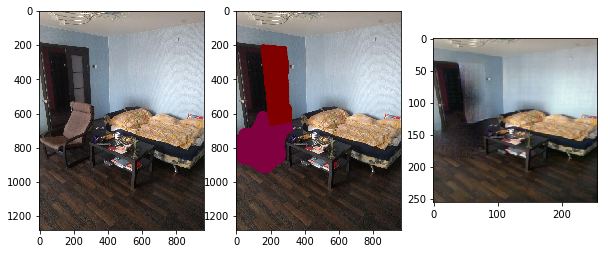

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
img = imread('../presentation/removing_original.jpg')
plt.imshow(img)


plt.subplot(1,3,2)
img = imread('../live_tests/1_altered_1.png')
plt.imshow(img)

modified = sess.run(output_image, feed_dict={x: imresize(img, [256, 256])})
plt.subplot(1,3,3)
plt.imshow(modified[:,:,:])
